Este é um pequeno estudo pessoal sobre o tempo de execução do algoritmo KNN. A base [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) já é uma base que utilize bastante durante minha dissertação e é consideravelmente grande para treinamento de modelos, possuindo 284.807 observações.

Neste notebook queremos testar a velocidade de predição do algoritmo KNN nesta base em específico.

# Bibliotecas

In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Base

In [2]:
CreditCard = pd.read_csv(
    r"G:\Meu Drive\Data Science\Bases\Classificação\Credit Card Fraud Detection.csv"
)

CreditCard.drop('Time', axis = 1, inplace = True)

# Modelagem

In [3]:
X = CreditCard.iloc[:, :-1]
y = CreditCard['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Escalona as covariáveis de forma que a média seja 0 e o desvio padrão 1. Importante para o algoritmo KNN
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Inicializa e treina o algoritmo
KNN_clf = KNeighborsClassifier()
KNN_clf.fit(X_train, y_train)

KNeighborsClassifier()

# Desempenho

In [4]:
print(f"Temos um total de {X_test.shape[0]} instâncias que queremos prever.")

Temos um total de 71202 instâncias que queremos prever.


In [5]:
start_time = time.time()

y_pred = KNN_clf.predict(X_test)

print(f"Tempo de execução da previsão: {time.time() - start_time:.2f}")

Tempo de execução da previsão: 18.51


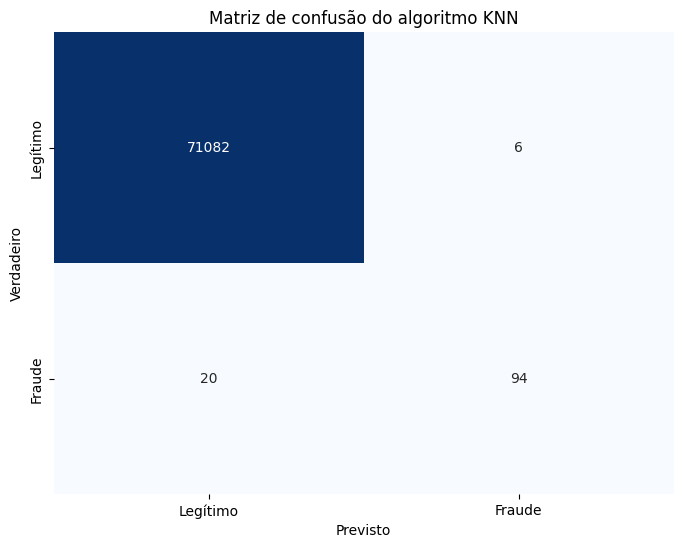

In [6]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, index = ['Legítimo', 'Fraude'], columns = ['Legítimo', 'Fraude'])

plt.figure(figsize = (8,6))

sns.heatmap(
    cm,
    annot = True,
    cmap = 'Blues',
    fmt = 'g',
    cbar = False
)

plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')

plt.title('Matriz de confusão do algoritmo KNN')
plt.show()